In [1]:
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn as sns


In [2]:
custom_dict = {'Jan 2024':0,'Feb 2024':1, 'Mar 2024':2, 'Apr 2024':3, 'May 2024':4}
filepath = 'E:/VSprojects/thingsboard/mi6/HEDNOKPIs/ovp_Alarms_raw_data/totalPhases/'
phasedict = {'L1':'A','L2':'B','L3':'C'}

In [3]:
def get_dev_info(device, address):
    
    r = requests.post(address + "/api/auth/login",
                      json={'username': 'meazonpro@meazon.com', 'password': 'meazonpro1'}).json()
    
    # acc_token is the token to be used in the next request
    acc_token = 'Bearer' + ' ' + r['token']
    
    # get devid by serial name
    r1 = requests.get(
        url=address + "/api/tenant/devices?deviceName=" + device,
        headers={'Content-Type': 'application/json', 'Accept': '*/*', 'X-Authorization': acc_token}).json()
    
    label = r1['label']
    devid = r1['id']['id']
    r1 = requests.get(
        url=address + "/api/device/" + devid + "/credentials",
        headers={'Content-Type': 'application/json', 'Accept': '*/*', 'X-Authorization': acc_token}).json()
    devtoken = r1['credentialsId']

    
    return devid,acc_token,label

labeldict = {}


address = 'https://mi6.meazon.com'
r = requests.post(address + "/api/auth/login",
                    json={'username': 'meazonpro@meazon.com', 'password': 'meazonpro1'}).json()

acc_token = 'Bearer' + ' ' + r['token']
entityId = '47545f30-5b7f-11ee-b2c9-653b42f73605'# DEDDHE ATHINAS
r1 = requests.get(url=address + "/api/entityGroup/"+entityId+"/entities?pageSize=1000&page=0",headers={'Content-Type': 'application/json', 
'Accept': '*/*', 'X-Authorization': acc_token}).json()


for i in range(0,len(r1['data'])):
    #   os.chdir('/home/azureuser/deddhePDF/')
    assetid = r1['data'][i]['id']['id']
    assetname = r1['data'][i]['name']

    if assetname[0]!='0':
    
        r2 = requests.get(url=address + "/api/relations/info?fromId="+assetid+"&fromType=ASSET",headers={'Content-Type': 'application/json', 'Accept': '*/*', 'X-Authorization': acc_token}).json()
        
        
        for j in range(0, len(r2)):
            device = r2[j]['toName']
            if device[:3]=='102':
                
                #try:
                [devid, acc_token, label] = get_dev_info(device, address)
                labeldict[label] = device
print(labeldict)

{'ΜΜ-423': '102.408.000218', 'ΜΠ-297': '102.408.000226', 'ΜΠ-013': '102.408.000196', 'ΜΠ-368': '102.408.000221', 'ΜΜ-014': '102.408.000217', 'ΜΠ-017': '102.408.000209', 'ΜΜ-092': '102.408.000202', 'ΜΠ-112': '102.408.000207', 'ΜΠ-009': '102.408.000227', 'ΜΠ-118': '102.408.000199', 'ΜΜ-141': '102.408.000222', 'ΜΠ-550': '102.408.000204', 'ΜΠ-564': '102.408.000201', 'ΜΠ-325': '102.408.000208', 'ΜΠ-725': '102.408.000225', 'ΜΠ-110': '102.408.000205', 'ΜΠ-222': '102.408.000448', 'ΜΜ-303': '102.408.000449', 'ΜΜ-062': '102.408.000793', 'MM-185': '102.408.000224', 'ΜΝ-010': '102.408.000195', 'ΜΡ-061': '102.408.000223', 'ΜΡ-093': '102.408.000198', 'ΜΓ-019': '102.408.000228', 'ΜΤ-052': '102.408.000220', 'ΜΝ-073': '102.408.000194', 'ΜΝ-122': '102.408.000192', 'ΜΤ-055': '102.408.000211', 'ΜΠ-219': '102.408.000216', 'MM-359': '102.408.000229', 'ΜΠ-014': '102.408.000197', 'ΜΠ-046': '102.408.000212', 'ΜΠ-263': '102.408.000215', 'ΜΠ-594': '102.408.000210', 'ΜΠ-520': '102.408.000200', 'ΜΠ-066': '102.408.

In [4]:


def multiplotfig(df):
    # Create a figure with 2 subplots (one above the other)
    # fig, axes = plt.subplots(2, 1, figsize=(14, 16))
    fig, axes = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [3, 1]})

    # First subplot: boxplot
    sns.boxplot(ax=axes[0], data=df, x='Transformer', y='kVA', hue='month', palette='Set2', whis=1.5)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Overpower kVA %')
    axes[0].set_title('Overpower boxplots for L1+L2+L3')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].legend(title='Month')
    
    # Second subplot: another plot (e.g., bar plot)
    sns.barplot(ax=axes[1], data=df, x='Transformer', y='% of time', hue='month', palette='Set2')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('% of time')
    axes[1].set_title('Time % of overpower alarms')
    axes[1].tick_params(axis='x', rotation=45)
    # axes[1].legend(title='Month')
    axes[1].legend().remove()

    # Adjust layout
    plt.tight_layout()
    plt.savefig('boxplot_time_total.png', dpi=300)
    # plt.show()

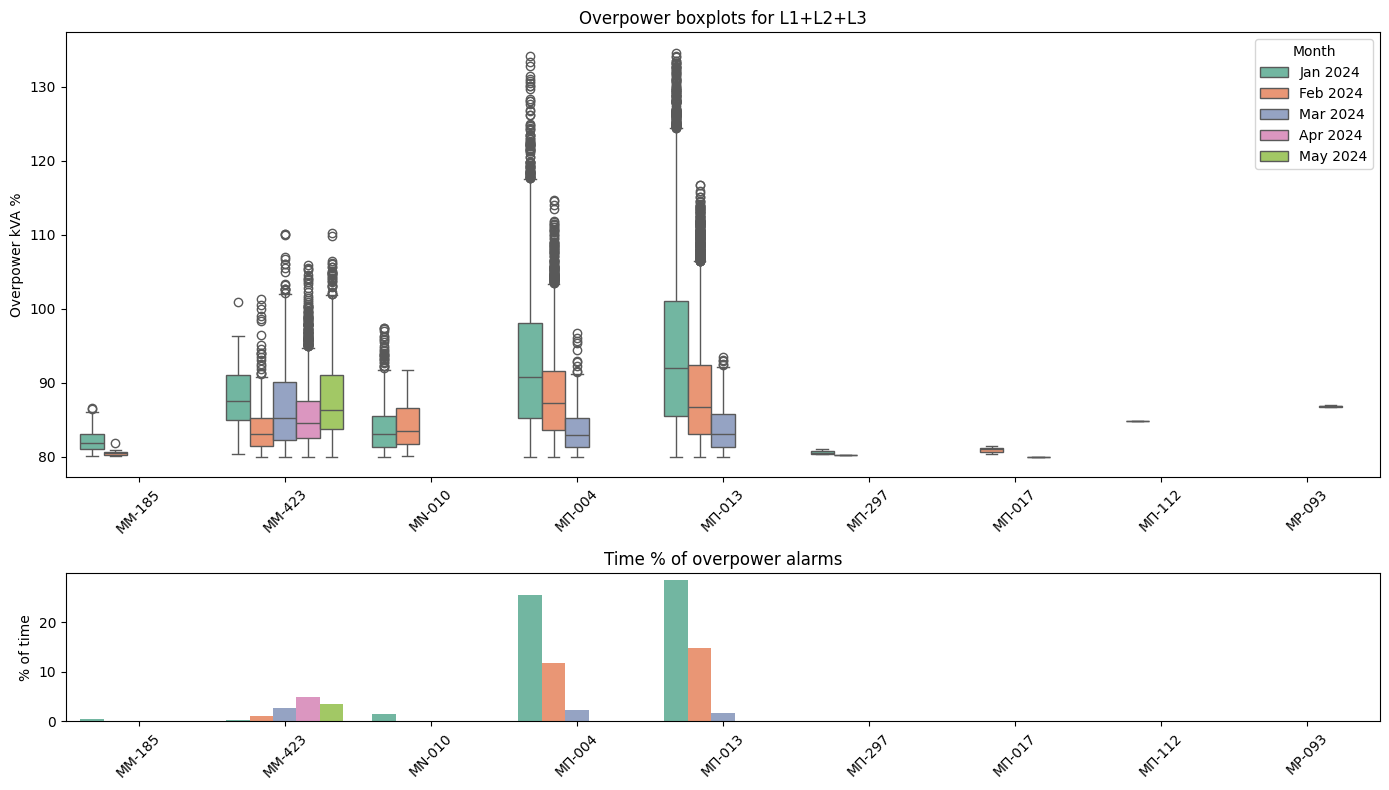

In [5]:
df = pd.DataFrame([])

allfiles = os.listdir(filepath)
for name in ['Jan', 'Feb', 'Mar', 'Apr', 'May']:
    matching_files = [f for f in allfiles if name in f]
    for filename in matching_files:
        tmp = pd.read_excel(filepath+filename, engine='openpyxl')
        tmp = tmp.drop('totalapwr', axis=1)
        tmp = tmp.rename(columns={'exceed_perc':'kVA'})
        tmp['kVA'] = pd.to_numeric(tmp['kVA'])
        tmp['month'] = name+' 2024'
        # print(summary.loc[summary['Transformer']==transf,'% of time ' + ph])
        df = pd.concat([df, tmp])

    # print(pwrdf)



# Map the custom order to the second column
df['custom'] = df['month'].map(custom_dict)
# Sort the DataFrame by the first column ascending and the custom order of the second column
df = df.sort_values(by=['custom','Transformer'])
# Drop the auxiliary column used for sorting
df = df.drop(columns=['custom'])
df = df.reset_index(drop=True)

# print(df)
multiplotfig(df)